In [24]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Accuracy Matrices

In [ ]:
accuracy_matrix_og = np.array([
    [33.4, 36.4, 36.6, 40.9, 40.0], # 1 users, 1, 5, 10, 30, 50 reps
    [43.3, 60.2, 63.5, 66.7, 69.6], # 5 users, 1, 5, 10, 30, 50 reps
    [60.4, 75.2, 77.6, 80.1, 80.5], # 20 users, 1, 5, 10, 30, 50 reps
    [73.6, 81.6, 83.5, 85.9, 86.7], # 50 users, 1, 5, 10, 30, 50 reps
    [78.7, 87.4, 88.4, 90.1, 88.4], # 150 users, 1, 5, 10, 30, 50 reps
    [84.3, 88.8, 89.6, 91.1, 92.5], # 300 users, 1, 5, 10, 30, 50 reps
])

accuracy_matrix_lstm = np.array([
    [31.283, 31.64, 32.704, 32.904, 33.542], # 1 users, 1, 5, 10, 30, 50 reps
    [36.301, 38.563, 41.019, 43.209, 49.956], # 5 users, 1, 5, 10, 30, 50 reps
    [41.297, 48.792, 54.841, 73.558, 77.553], # 20 users, 1, 5, 10, 30, 50 reps
    [44.077, 62.134, 71.733, 82.923, 84.586], # 50 users, 1, 5, 10, 30, 50 reps
    [52.14, 81.493, 85.738, 88.605, 89.513], # 150 users, 1, 5, 10, 30, 50 reps
    [68.395, 85.746, 88.786, 91.165, 91.507], # 300 users, 1, 5, 10, 30, 50 reps
])

accuracy_matrix_lstm_pretrained = np.array([
    [28.499, 28.992, 31.127, 31.566, 33.946], # 1 users, 1, 5, 10, 30, 50 reps
    [34.863, 40.919, 43.502, 45.04, 56.465], # 5 users, 1, 5, 10, 30, 50 reps
    [41.12, 52.2, 62.223, 76.307, 78.63], # 20 users, 1, 5, 10, 30, 50 reps
    [52.896, 69.976, 78.753, 83.959, 85.008], # 50 users, 1, 5, 10, 30, 50 reps
    [57.382, 84.301, 86.38, 88.85, 89.739], # 150 users, 1, 5, 10, 30, 50 reps
    [74.51, 86.846, 89.09, 91.246, 91.733], # 300 users, 1, 5, 10, 30, 50 reps
])

difference_matrix_lstm = accuracy_matrix_lstm_pretrained - accuracy_matrix_lstm

accuracy_matrix_cnnlstm = np.array([
    [27.644, 30.243, 29.513, 30.792, 29.98], # 1 users, 1, 5, 10, 30, 50 reps
    [29.916, 32.077, 32.903, 33.182, 35.661], # 5 users, 1, 5, 10, 30, 50 reps
    [31.933, 33.726, 34.493, 44.741, 58.395], # 20 users, 1, 5, 10, 30, 50 reps
    [33.262, 34.759, 36.006, 68.641, 82.049], # 50 users, 1, 5, 10, 30, 50 reps
    [35.186, 40.911, 62.666, 90.261, 91.532], # 150 users, 1, 5, 10, 30, 50 reps
    [34.244, 64.353, 87.147, 93.0, 93.802], # 300 users, 1, 5, 10, 30, 50 reps
])

accuracy_matrix_cnnlstm_pretrained = np.array([
    [26.471, 29.115, 29.596, 28.909, 29.927], # 1 users, 1, 5, 10, 30, 50 reps
    [30.0, 31.503, 31.98, 33.798, 38.351], # 5 users, 1, 5, 10, 30, 50 reps
    [31.58, 33.877, 36.044, 56.267, 70.456], #20 users, 1, 5, 10, 30, 50 reps
    [33.185, 38.304, 50.678, 79.725, 84.041], # 50 users, 1, 5, 10, 30, 50 reps
    [34.825, 68.944, 81.905, 89.466, 91.057], # 150 users, 1, 5, 10, 30, 50 reps
    [39.875, 82.564, 87.728, 92.273, 93.419], # 300 users, 1, 5, 10, 30, 50 reps
])

difference_matrix_cnnlstm = accuracy_matrix_cnnlstm_pretrained - accuracy_matrix_cnnlstm

# Differences between LSTM and CNN-LSTM
difference_matrix_cnnlstm_lstm = accuracy_matrix_cnnlstm - accuracy_matrix_lstm
difference_matrix_cnnlstm_pretrained_lstm_pretrained = accuracy_matrix_cnnlstm_pretrained - accuracy_matrix_lstm_pretrained

## Plotting definition

In [26]:
def plot_matrix_seaborn(matrix, title, labels, cmap='viridis'):
    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(matrix, annot=True, fmt=".1f", cmap=cmap, cbar_kws={'label': 'Accuracy (%)'})
    ax.set_title(title)
    
    # Adjust x and y ticks to center
    ax.set_xticks(np.arange(len(labels['x'])) + 0.5)  # Center ticks
    ax.set_xticklabels(labels['x'])
    ax.set_yticks(np.arange(len(labels['y'])) + 0.5)  # Center ticks
    ax.set_yticklabels(labels['y'])
    
    # Additional adjustments
    ax.set_xlabel("# of Reps per Gesture")
    ax.set_ylabel("# of Subjects in Training Set")
    ax.tick_params(axis='x', rotation=0) 

    plt.show()

# Labels for axes
labels = {
    'x': ['1', '5', '10', '30', '50'],
    'y': ['1', '5', '20', '50', '150', '300']
}

## Outputs

### EMG

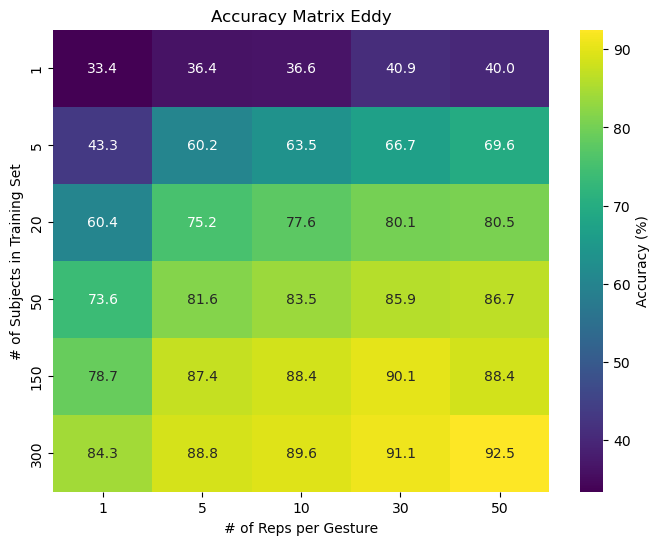

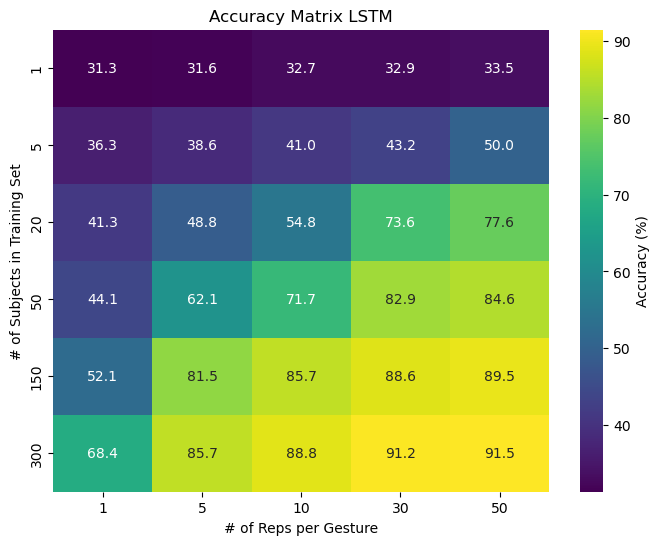

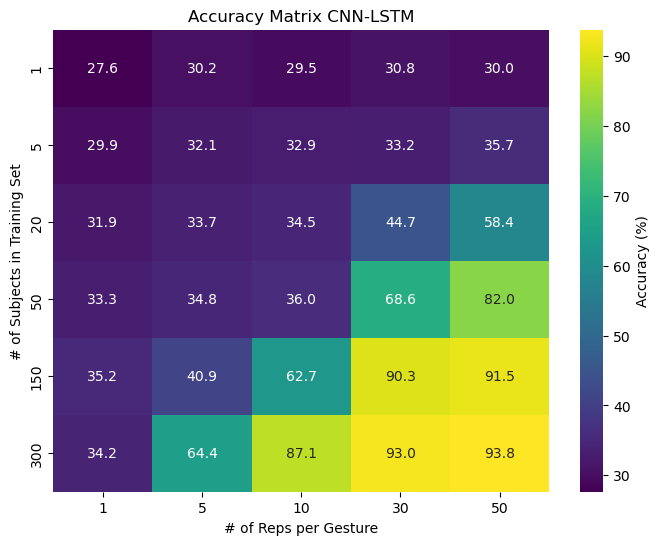

In [27]:
plot_matrix_seaborn(accuracy_matrix_og, "Accuracy Matrix Eddy", labels)
plot_matrix_seaborn(accuracy_matrix_lstm, "Accuracy Matrix LSTM", labels)
plot_matrix_seaborn(accuracy_matrix_cnnlstm, "Accuracy Matrix CNN-LSTM", labels)

### Pretrained

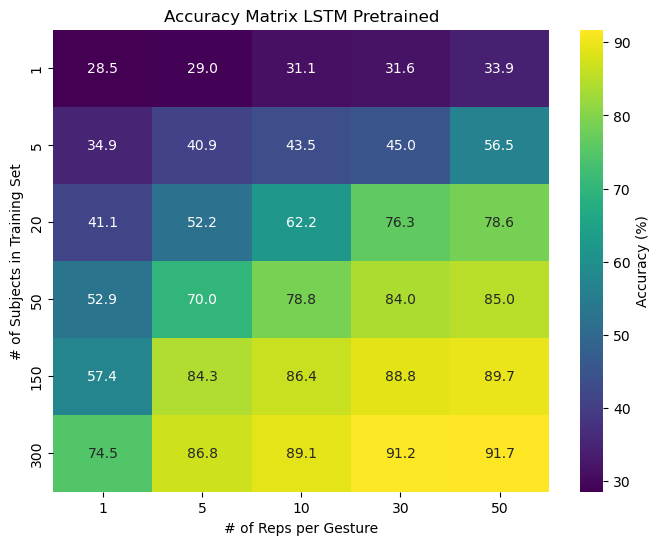

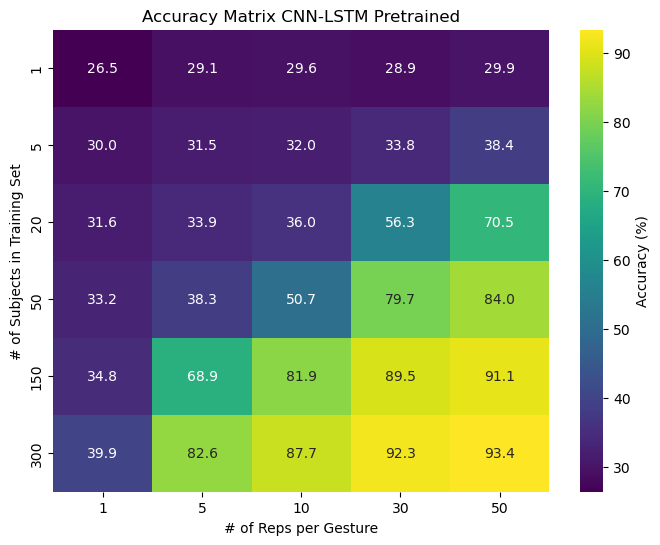

In [28]:
plot_matrix_seaborn(accuracy_matrix_lstm_pretrained, "Accuracy Matrix LSTM Pretrained", labels)
plot_matrix_seaborn(accuracy_matrix_cnnlstm_pretrained, "Accuracy Matrix CNN-LSTM Pretrained", labels)

### Difference

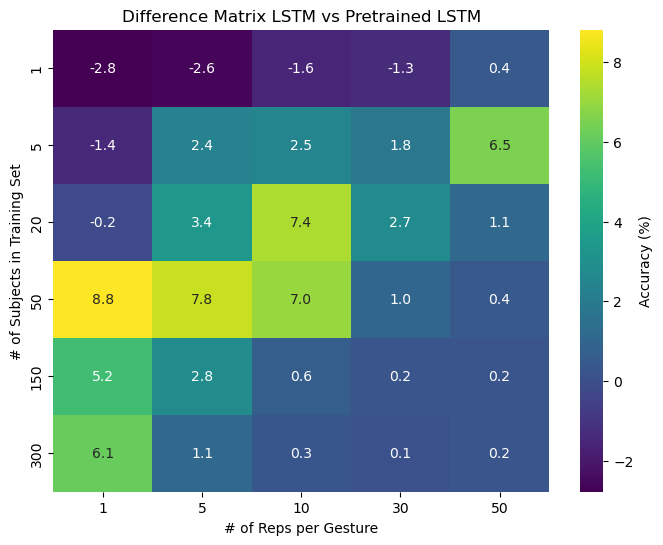

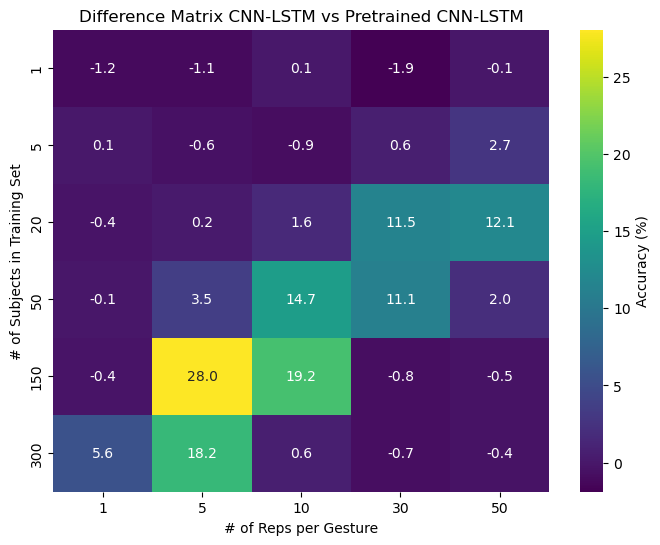

In [29]:
plot_matrix_seaborn(difference_matrix_lstm, "Difference Matrix LSTM vs Pretrained LSTM", labels)
plot_matrix_seaborn(difference_matrix_cnnlstm, "Difference Matrix CNN-LSTM vs Pretrained CNN-LSTM", labels)

### Differences between Models

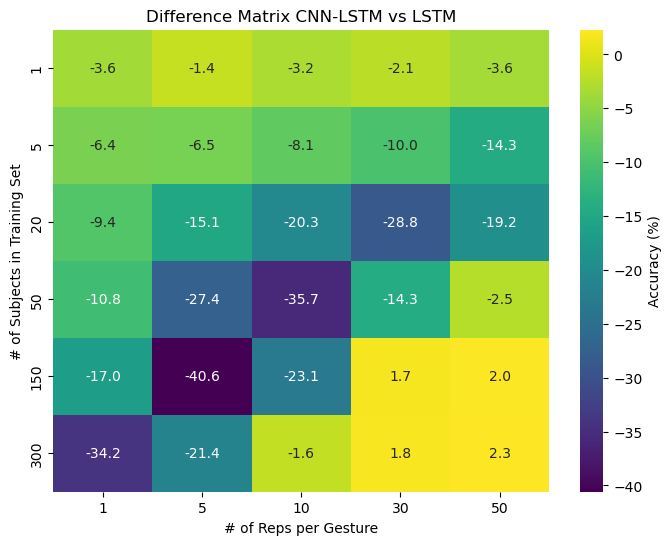

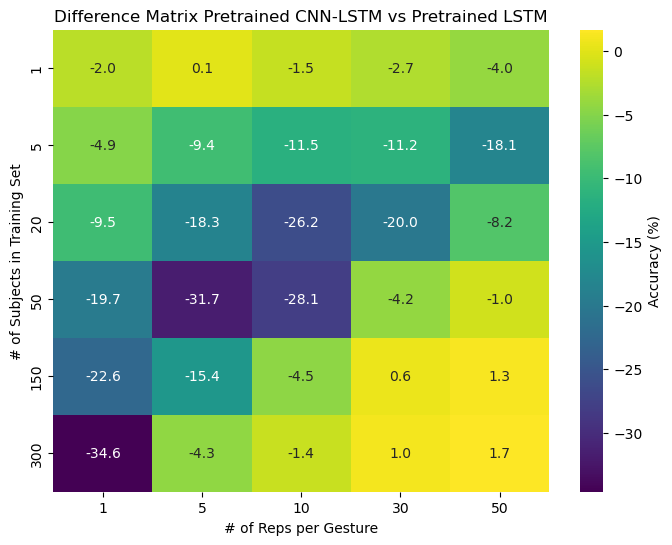

In [30]:
plot_matrix_seaborn(difference_matrix_cnnlstm_lstm, "Difference Matrix CNN-LSTM vs LSTM", labels)
plot_matrix_seaborn(difference_matrix_cnnlstm_pretrained_lstm_pretrained, "Difference Matrix Pretrained CNN-LSTM vs Pretrained LSTM", labels)